Build a regression model.

In [60]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [61]:
# Read the data from the CSV file
poi_data = pd.read_csv('/Users/skylerwilson/Desktop/Lighthouse_Labs/Projects/statistical_modeling/data/poi_api_data.csv')
poi_data = poi_data.drop("Unnamed: 0", axis=1)
poi_data.head()

,business_id,name,address,latitude,longitude,rating,category_id,category,free bikes
0,0_2TaPyt9IR2wfnSqqGSRw,GazaKjøkken,"Øvingshotellet, Korsgata, Fredensborg, Grünerl...",59.914452,10.747173,5.0,13065,Restaurant,NaN
1,cAG1s3UZosdF9e7WZzGMpg,Picasso Pizza,"Recharge Skøyen, Oslo kommune, Drammensveien, ...",59.928856,10.765174,5.0,13065,Restaurant,NaN
2,_udObTLAN6eJe35wTzt0sA,Stangeriet,"85, Økernveien, Marienfryd, Grünerløkka, Oslo,...",59.922359,10.751690,5.0,13065,Restaurant,NaN
3,aWTw_nG2eQmakTX_VumWrg,Syverkiosken,"Kirkeveien, Lindern, St. Hanshaugen, Oslo, 045...",59.928379,10.752430,5.0,13065,Restaurant,NaN
4,RpFugceRsP1bIUf-Rww5BA,La Villa Restaurant,"38, Uelands gate, Lovisenberg, St. Hanshaugen,...",59.912780,10.763910,5.0,13065,Restaurant,NaN


In [62]:
poi_data_complete = poi_data[poi_data['business_id'].notna()]

X = poi_data_complete[['latitude', 'longitude', 'category_id']]
y = poi_data_complete['rating']

# Fit the logistic regression model
model = sm.OLS(y, sm.add_constant(X)).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     182.8
Date:                Sun, 02 Jul 2023   Prob (F-statistic):          3.92e-115
Time:                        23:53:08   Log-Likelihood:                -11210.
No. Observations:                9181   AIC:                         2.243e+04
Df Residuals:                    9177   BIC:                         2.246e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1101.6112     49.623     22.200      

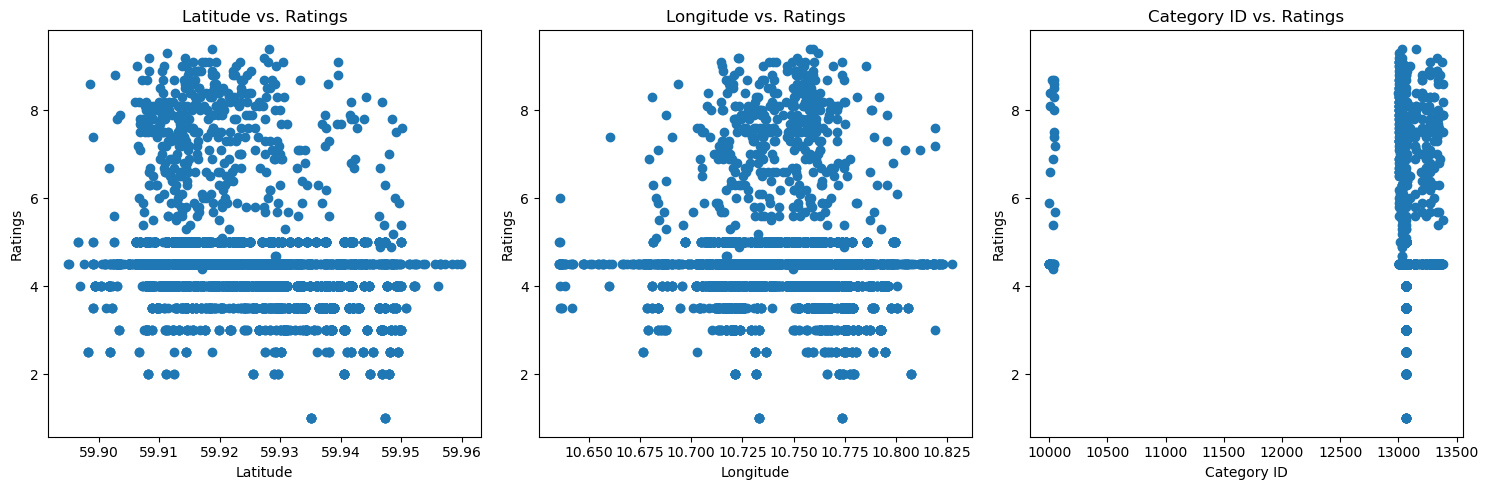

In [64]:
# Create a subplot with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot for latitude vs. ratings
axes[0].scatter(poi_data_complete['latitude'], poi_data_complete['rating'])
axes[0].set_xlabel('Latitude')
axes[0].set_ylabel('Ratings')
axes[0].set_title('Latitude vs. Ratings')

# Scatter plot for longitude vs. ratings
axes[1].scatter(poi_data_complete['longitude'], poi_data_complete['rating'])
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Ratings')
axes[1].set_title('Longitude vs. Ratings')

# Scatter plot for category_id vs. ratings
axes[2].scatter(poi_data_complete['category_id'], poi_data_complete['rating'])
axes[2].set_xlabel('Category ID')
axes[2].set_ylabel('Ratings')
axes[2].set_title('Category ID vs. Ratings')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [57]:
#ratings threshold
threshold = poi_data_complete['rating'].mean()

poi_data_complete['above_threshold'] = np.where(poi_data_complete['rating'] > threshold, 1, 0)

poi_data_complete.head()

/var/folders/59/vc05kjdn7s14r9w654dq4xlh0000gn/T/ipykernel_30108/3166520659.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poi_data_complete['above_threshold'] = np.where(poi_data_complete['rating'] > threshold, 1, 0)


,business_id,name,category_id,category,address,latitude,longitude,rating,free bikes,above_threshold
0,57f53ed7498e23279caaed8e,Txotx,13003,Bar,"Øvingshotellet, Korsgata, Fredensborg, Grünerl...",59.919337,10.759947,9.1,NaN,1
1,4d6803f3709bb60c63f9b014,Le Benjamin Bar & Bistro,13148,French Restaurant,"Recharge Skøyen, Oslo kommune, Drammensveien, ...",59.918750,10.758048,9.4,NaN,1
2,547a5140498e356dc652cfb7,Territoriet,13025,Wine Bar,"85, Økernveien, Marienfryd, Grünerløkka, Oslo,...",59.918887,10.757560,8.8,NaN,1
3,4bd1eaae77b29c74bb8f8d82,Glød,13003,Bar,"Kirkeveien, Lindern, St. Hanshaugen, Oslo, 045...",59.920272,10.759572,8.2,NaN,1
4,5547ba21498e3c063aa9a7ba,Bd57,13006,Beer Bar,"38, Uelands gate, Lovisenberg, St. Hanshaugen,...",59.919910,10.757172,8.4,NaN,1


Provide model output and an interpretation of the results. 

# Stretch

How can you turn the regression model into a classification model?

As you can see below, the classification regression model i came up with was to create a dummy variable that is 1 if the rating was above the mean rating and 0 otherwise. I then ran a GLM model on the dummy variable and used backwards stepwise regression to complete the model seen below. 

My approach was as follows,
step 1: isolate a variable in the data frame that i could turn into a dummy variable given some threshold
step 2: create the new column with the dummy variable and use that as the X (independant variable) in the GLM model
step 3: use backwards stepwise regression to get the statistically significant predictors of the categorical variable i created

#create a classification model
X = poi_data_complete[['latitude', 'longitude']]
y = poi_data_complete['above_threshold']

# Fit the logistic regression model
model = sm.GLM(y, sm.add_constant(X), family=sm.families.Binomial()).fit()

# Print the model summary
print(model.summary())

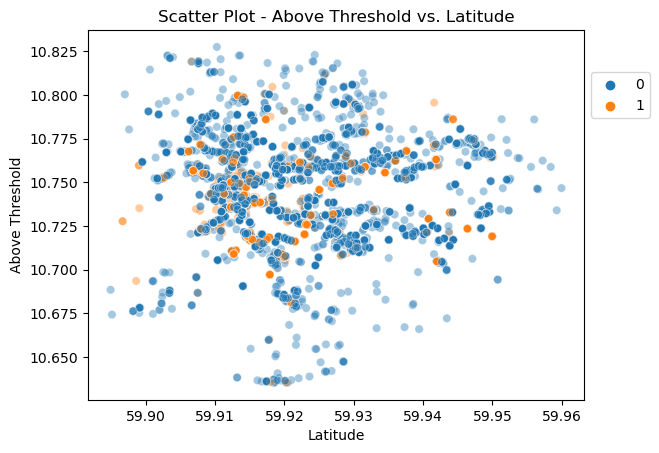

In [59]:
# Create a scatter plot
sns.scatterplot(x='latitude', y='longitude', data=poi_data_complete, hue='above_threshold', alpha=0.4)

# Set plot title and axes labels
plt.title('Scatter Plot - Above Threshold vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Above Threshold')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.824))

# Show the plot
plt.show()